In [1]:
from sklearn.datasets import load_diabetes

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
X, y = load_diabetes(return_X_y = True)

In [3]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [5]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [6]:
print(reg.coef_)
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [7]:
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.4399338661568968

In [8]:
class GDRegressor:
    
    def __init__(self, learning_rate=0.01, epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.losses = []

    def fit(self, X_train, y_train):
        # initialize the value of intercept and coefficients
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1]) # -> [1,1,1,1,1,1,1,1,1,1]

        for i in range(self.epochs):
            # update all the coeffs and the intercept
            
            y_hat = np.dot(X_train, self.coef_) + self.intercept_

            loss = np.mean((y_train - y_hat) ** 2)
            self.losses.append(loss)
            
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)

            coef_der = -2 * np.dot((y_train - y_hat), X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)

        print(self.intercept_,self.coef_)

    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_ 

In [9]:
gdr = GDRegressor(epochs=1000, learning_rate=0.5)

In [10]:
gdr.fit(X_train, y_train)

152.01351687661833 [  14.38990585 -173.7235727   491.54898524  323.91524824  -39.32648042
 -116.01061213 -194.04077415  103.38135565  451.63448787   97.57218278]


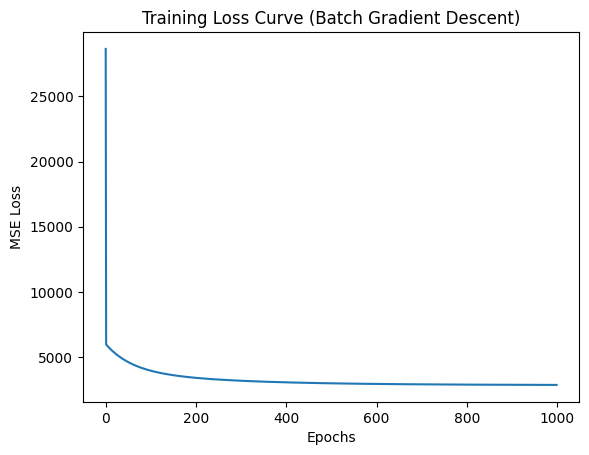

In [11]:
import matplotlib.pyplot as plt
plt.plot(gdr.losses)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve (Batch Gradient Descent)")
plt.show()

In [12]:
y_pred = gdr.predict(X_test)

In [13]:
r2_score(y_test, y_pred)

0.4534503034722803